# Keras Wine Classify(by moriitkys 2020/05)
【キカガク流】現場で使えるChainerによるディープラーニング入門　を参考にしています。（下にページ記載）  
上記講座ではChainerによる実装をしていますが、このノートブックではKerasで同様のことを実装しています。また、実装では
https://qiita.com/moriitkys/items/cd57b139bcdaf6bd0e5e
を参考にしています。

【キカガク流】現場で使えるChainerによるディープラーニング入門
https://www.udemy.com/course/kikagaku-chainer/learn/lecture/11004080#overview

scikit-learnで入手できるワインの種類とそれぞれの13の特徴量がまとめられたデータセットを機械学習で分類するためのプログラムです。

## 環境
Anaconda3  
pandas==0.23.0  
scikit-learn==0.19.1  
seaborn==0.8.1  
tensorflow-gpu==1.5.0  
Keras==2.1.5  
以上で何か足りないものがあればpipでインストールしてください。

# ライブラリとデータセットのインポート
scikit-learnで読み込んだワインのデータセットはwine.dataで説明変数を、wine.targetで目的変数を取り出すことができます。
また、中心化や標準化もしておきます。

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
dataset_mean = df.mean()
#pd.DataFrame(wine.target)

# Centering
df_c = df-df.mean()
# Normalizing
df_norm = (df_c - df_c.mean()) / (df_c.max() - df_c.min())

# 変数はデータセットによって変更
 - 機械学習のモデルへ入力する変数 *s* (説明変数)
 - 分類する変数 *nb_classes* (目的変数)
 
を決める。

In [2]:
s = 13
nb_classes = 3

# データセットを訓練用と評価用(25%)に分ける

In [3]:
# Split data
from keras.utils import np_utils
train_X, test_X, train_Y, test_Y = train_test_split(df_norm, wine.target[:], test_size = 0.25)

train_Y1 = np_utils.to_categorical(train_Y,nb_classes)
test_Y1 = np_utils.to_categorical(test_Y,nb_classes)

# モデルの構築、学習の実行
opt = keras.optimizers.SGD(lr=0.08)の部分を変えて結果がどのように変化するかチェックしてみてください。

Train on 133 samples, validate on 45 samples
Epoch 1/50
133/133 [==============================] - 1s 9ms/step - loss: 1.0569 - mean_absolute_error: 0.4345 - acc: 0.5865 - val_loss: 1.0484 - val_mean_absolute_error: 0.4326 - val_acc: 0.6667
Epoch 2/50
133/133 [==============================] - 0s 172us/step - loss: 1.0095 - mean_absolute_error: 0.4231 - acc: 0.7895 - val_loss: 1.0031 - val_mean_absolute_error: 0.4217 - val_acc: 0.8889
Epoch 3/50
133/133 [==============================] - 0s 172us/step - loss: 0.9627 - mean_absolute_error: 0.4114 - acc: 0.8872 - val_loss: 0.9600 - val_mean_absolute_error: 0.4108 - val_acc: 0.9111
Epoch 4/50
133/133 [==============================] - 0s 157us/step - loss: 0.9185 - mean_absolute_error: 0.3995 - acc: 0.9398 - val_loss: 0.9172 - val_mean_absolute_error: 0.3995 - val_acc: 0.9556
Epoch 5/50
133/133 [==============================] - 0s 150us/step - loss: 0.8768 - mean_absolute_error: 0.3878 - acc: 0.9549 - val_loss: 0.8753 - val_mean_absolute

Epoch 42/50
133/133 [==============================] - 0s 187us/step - loss: 0.1656 - mean_absolute_error: 0.0923 - acc: 0.9850 - val_loss: 0.1637 - val_mean_absolute_error: 0.0945 - val_acc: 1.0000
Epoch 43/50
133/133 [==============================] - 0s 142us/step - loss: 0.1609 - mean_absolute_error: 0.0900 - acc: 0.9850 - val_loss: 0.1592 - val_mean_absolute_error: 0.0920 - val_acc: 1.0000
Epoch 44/50
133/133 [==============================] - 0s 135us/step - loss: 0.1569 - mean_absolute_error: 0.0877 - acc: 0.9850 - val_loss: 0.1550 - val_mean_absolute_error: 0.0897 - val_acc: 1.0000
Epoch 45/50
133/133 [==============================] - 0s 150us/step - loss: 0.1527 - mean_absolute_error: 0.0854 - acc: 0.9850 - val_loss: 0.1509 - val_mean_absolute_error: 0.0874 - val_acc: 1.0000
Epoch 46/50
133/133 [==============================] - 0s 142us/step - loss: 0.1490 - mean_absolute_error: 0.0834 - acc: 0.9850 - val_loss: 0.1471 - val_mean_absolute_error: 0.0853 - val_acc: 1.0000
Epoch

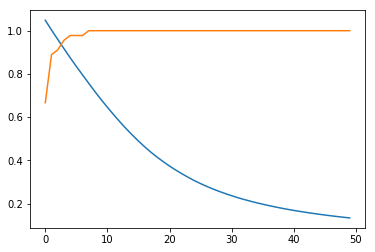

In [4]:
# Build model
from keras.optimizers import Adam, RMSprop, SGD
model = Sequential()
model.add(Dense(128, input_shape=(s, ), use_bias=False, activation='relu'))
#model.add(Dense(128, activation='relu'))
#model.add(Dense(128, activation='relu'))
#model.add(Dense(128, activation='relu'))
model.add(Dense(nb_classes, activation='softmax'))
#opt = keras.optimizers.Adam(lr=0.08)
#opt = keras.optimizers.RMSprop(lr=0.08)
opt = keras.optimizers.SGD(lr=0.08)

model.compile(optimizer=opt,
      loss='categorical_crossentropy',
      metrics=['mae', 'acc'])

# Start training
history = model.fit(train_X, train_Y1, epochs=50, batch_size=20, verbose=1, validation_data=(test_X,test_Y1))

print(model.summary())
open("model", "w").write(model.to_json())
model.save_weights('param.hdf5')

weights = model.get_weights()

# plot val_loss 損失値の推移をプロット
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_acc'])
plt.show()

# 結果
上記のグラフのように、val_accであるオレンジのグラフが1に近づいて行ったことから学習は成功したと思います。